In [1]:
import scipy.io     # To Load data from matlab files: https://docs.scipy.org/doc/scipy/reference/tutorial/io.html
import matplotlib.pyplot as plt
import numpy as np

In [12]:
# Read data
mat = scipy.io.loadmat('./Data/A4-SampleData/random_20timesLarger_F0A1_300Hz.mat')
mat

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Thu Nov 15 10:39:00 2007',
 '__version__': '1.0',
 '__globals__': [],
 'f0': array([[ 0.00465658],
        [ 0.00627838],
        [-0.00215498],
        ...,
        [ 0.00400786],
        [ 0.00173734],
        [ 0.0053053 ]]),
 'dataset': array(['Simulated small tremor'], dtype='<U22'),
 'samplerate': array(['500 Hz'], dtype='<U6'),
 'info': array(['This is simulated data that has been adjusted for the structure in the South Wing lab'],
       dtype='<U85')}

In [13]:
# Plot ch1 (i/p) and ch2 (o/p) data
# Seems like ch1 is Force Transducer, while ch2 is response from a floor (more details at https://www.vle.cam.ac.uk/mod/book/view.php?id=154922&chapterid=57851)
# Time is measured for 15 sec

sampleFreq = 300 # Hz
t = np.arange(len(mat['data_ch1'])) / sampleFreq

fig, axs = plt.subplots(nrows=2, figsize=((8,8)))
fig.suptitle("Floor 1 response to 5 Hz sin wave sampled at 300 Hz")

axs[0].plot(t, mat['data_ch1'], label="Ch1")
axs[0].set_ylabel("Amplitude")
axs[0].set_xlabel("Time / s")
axs[0].set_title("Force Transducer Input")

axs[1].plot(t, mat['data_ch2'], label="Ch2")
axs[1].set_ylabel("Amplitude")
axs[1].set_xlabel("Time / s")
axs[1].set_title("Floor 1 Response")

KeyError: 'data_ch1'

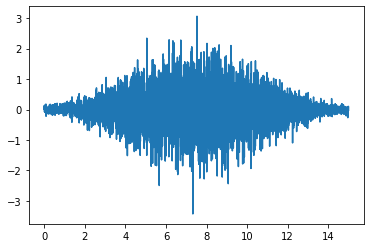

In [9]:
# Use window
data = np.ndarray.flatten(mat['data_ch1']) * np.hamming(len(mat['data_ch1']))
plt.plot(t, data)

Text(0.5, 0, 'Freq / Hz')

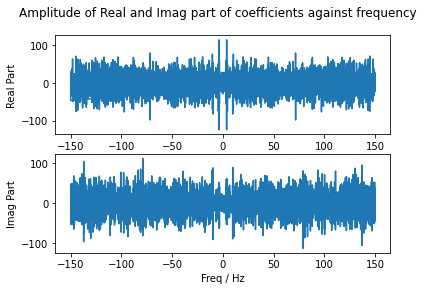

In [10]:
# DFT Analysis

fig, axs = plt.subplots(nrows=2)
fig.suptitle("Amplitude of Real and Imag part of coefficients against frequency")
 
#sp = np.fft.fft(np.ndarray.flatten(mat['data_ch1']))        # Fourier coefficients (complex)
sp = np.fft.fft(data)
freq = np.fft.fftfreq(len(mat['data_ch1']), 1/sampleFreq)   # Freq bins

axs[0].plot(freq, sp.real)      # NOTE: Could also plot sp.imag, but it shd be the same as the real part??
axs[0].set_ylabel("Real Part")
axs[0].set_xlabel("Freq / Hz")

axs[1].plot(freq, sp.imag)
axs[1].set_ylabel("Imag Part")
axs[1].set_xlabel("Freq / Hz")

Peak Freq at 3.67 Hz



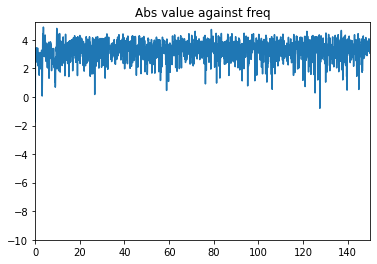

In [11]:
# Plot the absolute values of the +ve freq

# Remove -ve freq
freq = freq[:int(len(freq)/2)]
sp = sp[:int(len(sp)/2)]

# Take the absolut value of sp
sp = np.absolute(sp)

plt.plot(freq, np.log(sp))
plt.xlim(0, sampleFreq/2)
plt.ylim(-10)
plt.title("Abs value against freq")

print(f"Peak Freq at {freq[np.argmax(sp)]:.2f} Hz\n")